In [ ]:
import pandas as pd
import numpy as np

# Load weather data
weather_df = pd.read_csv('demo_data.csv')

# Load county centroid data and map county names to weather data
df_counties = pd.read_csv('Iowa_Counties_Centroid.csv')
weather_df['county_name'] = weather_df['location_id'].apply(lambda x: df_counties.loc[x, 'CountyName'])
weather_df['time'] = pd.to_datetime(weather_df['time'])

weather_df

In [27]:
import numpy as np
def calculate_wind_shear(speed1, speed2, dir1, dir2):
    # Convert wind directions from degrees to radians
    dir1_rad = np.radians(dir1)
    dir2_rad = np.radians(dir2)

    # Calculate the wind vector components at the first altitude
    u1 = speed1 * np.sin(dir1_rad)
    v1 = speed1 * np.cos(dir1_rad)

    # Calculate the wind vector components at the second altitude
    u2 = speed2 * np.sin(dir2_rad)
    v2 = speed2 * np.cos(dir2_rad)

    # Calculate the wind shear components
    shear_u = u2 - u1
    shear_v = v2 - v1

    # Calculate the magnitude of the wind shear vector
    shear_magnitude = np.sqrt(shear_u**2 + shear_v**2)
    
    return shear_magnitude

weather_df['wind_shear'] = weather_df.apply(lambda x: calculate_wind_shear(x['wind_speed_10m'], x['wind_speed_100m'], x['wind_direction_10m'], x['wind_direction_100m']), axis=1)

In [28]:
weather_df.head()

,location_id,time,temperature_2m,relative_humidity_2m,rain,pressure_msl,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,soil_temperature_0_to_7cm,county_name,wind_shear
0,0,2024-05-21 00:00:00,61.7,88,0.272,1007.7,958.3,15.6,25.5,35,35,64.4,Lyon,9.900000
1,0,2024-05-21 01:00:00,61.2,89,0.008,1006.6,957.2,13.1,22.1,37,39,63.1,Lyon,9.019574
2,0,2024-05-21 02:00:00,60.4,91,0.000,1005.6,956.2,13.1,22.8,57,60,62.2,Lyon,9.742108
3,0,2024-05-21 03:00:00,60.1,93,0.000,1005.0,955.6,11.1,19.6,54,59,61.7,Lyon,8.596846
4,0,2024-05-21 04:00:00,59.8,95,0.000,1004.0,954.6,10.8,19.1,68,72,61.4,Lyon,8.360321


In [30]:
#export weather_df to demo_data.json
#export time with format 'YYYY-MM-DDTHH:MM:SS'
weather_df['time'] = weather_df['time'].dt.strftime('%Y-%m-%dT%H:%M:%S')
weather_df.to_json('demo_data.json', orient='records')

In [4]:
#import xgb_model.pkl

import pickle

with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

In [9]:
weather_df.columns

Index(['location_id', 'time', 'temperature_2m', 'relative_humidity_2m', 'rain',
       'pressure_msl', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m',
       'soil_temperature_0_to_7cm', 'county_name', 'wind_shear'],
      dtype='object')

In [5]:
features=['temperature_2m', 'relative_humidity_2m', 'rain',
       'pressure_msl', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m',
       'soil_temperature_0_to_7cm', 'wind_shear']

X=weather_df[features]

In [6]:
y_pred = xgb_model.predict(X)
#predict proba
y_pred_proba = xgb_model.predict_proba(X)

In [7]:
weather_df['pred']=y_pred
weather_df['pred_proba']=y_pred_proba[:,1]

In [8]:
weather_df

,location_id,time,temperature_2m,relative_humidity_2m,rain,pressure_msl,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,soil_temperature_0_to_7cm,county_name,wind_shear,pred,pred_proba
0,0,2024-05-21 00:00:00,61.7,88,0.272,1007.7,958.3,15.6,25.5,35,35,64.4,Lyon,9.900000,0,0.008912
1,0,2024-05-21 01:00:00,61.2,89,0.008,1006.6,957.2,13.1,22.1,37,39,63.1,Lyon,9.019574,0,0.001562
2,0,2024-05-21 02:00:00,60.4,91,0.000,1005.6,956.2,13.1,22.8,57,60,62.2,Lyon,9.742108,0,0.003668
3,0,2024-05-21 03:00:00,60.1,93,0.000,1005.0,955.6,11.1,19.6,54,59,61.7,Lyon,8.596846,0,0.009674
4,0,2024-05-21 04:00:00,59.8,95,0.000,1004.0,954.6,10.8,19.1,68,72,61.4,Lyon,8.360321,0,0.003924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,98,2024-05-21 19:00:00,71.6,89,0.031,1000.1,977.6,17.6,29.3,198,197,72.8,Lee,11.706711,0,0.022735
2372,98,2024-05-21 20:00:00,68.8,87,0.248,1000.0,977.4,18.0,30.4,227,229,70.5,Lee,12.426853,0,0.014475
2373,98,2024-05-21 21:00:00,68.5,89,0.004,1001.6,978.9,15.0,25.2,224,225,69.3,Lee,10.205643,0,0.007759
2374,98,2024-05-21 22:00:00,67.6,75,0.000,1003.8,981.0,15.5,25.9,250,252,68.4,Lee,10.423488,0,0.001837


In [10]:
weather_df['pred'].value_counts()

pred
0    2142
1     234
Name: count, dtype: int64

<Axes: >

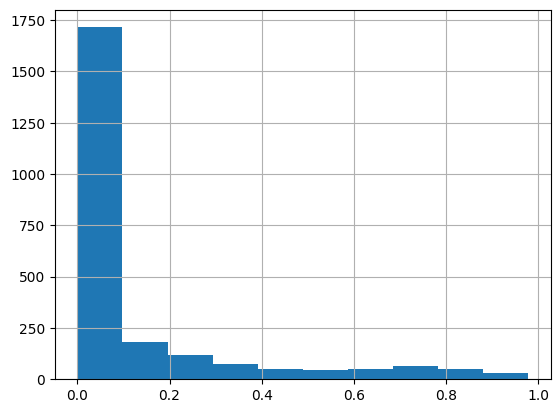

In [9]:
weather_df['pred_proba'].hist()

In [19]:
#show where prob_a is over .9
#max rows in pandas
pd.set_option('display.max_rows', None)
weather_df[weather_df['pred_proba']>.9]

,location_id,time,temperature_2m,relative_humidity_2m,rain,pressure_msl,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,soil_temperature_0_to_7cm,county_name,wind_shear,pred,pred_proba
178,7,2024-05-21 10:00:00,64.1,92,0.256,1004.8,960.6,6.1,9.1,144,144,63.6,Howard,3.000000,1,0.932971
179,7,2024-05-21 11:00:00,63.6,93,0.213,1004.1,959.9,9.8,15.0,145,148,63.6,Howard,5.238599,1,0.951786
417,17,2024-05-21 09:00:00,64.2,94,0.142,1004.2,963.5,12.4,19.9,125,128,63.4,Chickasaw,7.544955,1,0.947837
429,17,2024-05-21 21:00:00,63.3,91,0.012,994.3,953.9,15.1,23.9,198,202,64.4,Chickasaw,8.899338,1,0.902767
467,19,2024-05-21 11:00:00,70.1,84,0.004,1005.0,971.2,10.1,14.3,155,155,66.1,Clayton,4.200000,1,0.914843
489,20,2024-05-21 09:00:00,63.4,94,0.055,1004.6,966.2,14.9,24.5,114,115,63.5,Fayette,9.605790,1,0.915559
494,20,2024-05-21 14:00:00,75.6,72,0.028,998.9,961.5,19.2,27.1,178,178,70.6,Fayette,7.900000,1,0.915944
590,24,2024-05-21 14:00:00,70.4,80,0.122,994.9,952.4,20.5,28.8,186,185,70.6,Pocahontas,8.310827,1,0.939559
731,30,2024-05-21 11:00:00,73.3,81,0.043,1005.3,973.9,8.8,12.2,176,172,68.5,Dubuque,3.476068,1,0.957730
732,30,2024-05-21 12:00:00,72.6,85,0.055,1003.4,972.0,10.6,17.1,145,153,68.6,Dubuque,6.765946,1,0.917540


In [21]:
#RTS Table, just have time, county, and pred_proba
rts_table=weather_df[['time','county_name','pred_proba']]
#order by time

rts_table=rts_table.sort_values(by='time')
rts_table

,time,county_name,pred_proba
0,2024-05-21 00:00:00,Lyon,0.008912
1272,2024-05-21 00:00:00,Marshall,0.551095
1032,2024-05-21 00:00:00,Jones,0.002288
2232,2024-05-21 00:00:00,Van Buren,0.016619
1944,2024-05-21 00:00:00,Henry,0.006043
1824,2024-05-21 00:00:00,Marion,0.013148
2088,2024-05-21 00:00:00,Monroe,0.722737
528,2024-05-21 00:00:00,Cherokee,0.036941
1488,2024-05-21 00:00:00,Iowa,0.052921
120,2024-05-21 00:00:00,Kossuth,0.005277


In [23]:
#show again and sort by prob_a desc
rts_table[rts_table['pred_proba']>.8].sort_values(by='pred_proba',ascending=False)

,time,county_name,pred_proba
802,2024-05-21 10:00:00,Buchanan,0.978663
1067,2024-05-21 11:00:00,Linn,0.972968
829,2024-05-21 13:00:00,Black Hawk,0.961065
731,2024-05-21 11:00:00,Dubuque,0.957730
1522,2024-05-21 10:00:00,Polk,0.951855
179,2024-05-21 11:00:00,Howard,0.951786
2099,2024-05-21 11:00:00,Monroe,0.951513
1043,2024-05-21 11:00:00,Jones,0.950449
417,2024-05-21 09:00:00,Chickasaw,0.947837
1763,2024-05-21 11:00:00,Warren,0.940415


In [24]:
#export to csv
rts_table.to_csv('rts_table.csv',index=False)

# Demo App

In [ ]:
# Server Side

## mimic the stream
# load in weather data
weather_df = pd.read_csv('demo_data.csv')
#For each timestamp, send the data one record at time in json format



#send to the model on client, wait 5s, or check if new timestamp before sending next data


# Client Side


#client will update temp df with new data


#when data is fully populated, run the model proba
#if after 5s, data is not fully populated, keep previous proba and run model on rest of data

#update mapping table with new proba
#update SL Map

In [ ]:
#CLIENT SIDE

#gets stream and formats JSON into DF

#for each record in DF, apply xgboost proba
#Update proba in DF for each record, if timestamp is equal to latest timestamp
#if new latest timestamp, keep proba same

#Streamlit takes in proba, county name, and timestamp from DF
#Streamlit Updates 